In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#load dataset
df = pd.read_csv("Salary_Data.csv")
df.head()

,Rating,Company Name,Job Title,Salary,Salaries Reported,Location,Employment Status,Job Roles
0,3.8,Sasken,Android Developer,400000,3,Bangalore,Full Time,Android
1,4.5,Advanced Millennium Technologies,Android Developer,400000,3,Bangalore,Full Time,Android
2,4.0,Unacademy,Android Developer,1000000,3,Bangalore,Full Time,Android
3,3.8,SnapBizz Cloudtech,Android Developer,300000,3,Bangalore,Full Time,Android
4,4.4,Appoids Tech Solutions,Android Developer,600000,3,Bangalore,Full Time,Android


In [3]:
# inspect dataset
df.info()
df.shape


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22770 entries, 0 to 22769
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Rating             22770 non-null  float64
 1   Company Name       22769 non-null  object 
 2   Job Title          22770 non-null  object 
 3   Salary             22770 non-null  int64  
 4   Salaries Reported  22770 non-null  int64  
 5   Location           22770 non-null  object 
 6   Employment Status  22770 non-null  object 
 7   Job Roles          22770 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 1.4+ MB


(22770, 8)

In [4]:
#check missing values
df.isnull().sum()


Rating               0
Company Name         1
Job Title            0
Salary               0
Salaries Reported    0
Location             0
Employment Status    0
Job Roles            0
dtype: int64

In [5]:
#select only numeric columns 
df_numeric = df[['Rating', 'Salary', 'Salaries Reported']]



In [6]:
#making independent copy
df_numeric = df_numeric.copy()

In [7]:
#remove missing values
df_numeric.dropna(inplace=True)




In [8]:
#remove duplicates
df_numeric.drop_duplicates(inplace=True)



In [9]:
#convert datatypes
df_numeric = df_numeric.copy()

df_numeric.loc[:, 'Rating'] = df_numeric['Rating'].astype(float)
df_numeric.loc[:, 'Salary'] = df_numeric['Salary'].astype(float)
df_numeric.loc[:, 'Salaries Reported'] = df_numeric['Salaries Reported'].astype(float)


In [10]:
#verify datatypes
df_numeric.dtypes


Rating               float64
Salary                 int64
Salaries Reported      int64
dtype: object

In [11]:
#EDA statistical summary
df_numeric.describe()


,Rating,Salary,Salaries Reported
count,4910.000000,4.910000e+03,4910.000000
mean,3.820896,8.907186e+05,4.102037
std,0.679556,1.628274e+06,14.345076
min,1.000000,2.112000e+03,1.000000
25%,3.500000,2.760000e+05,1.000000
50%,3.900000,5.500000e+05,1.000000
75%,4.300000,1.100000e+06,3.000000
max,5.000000,9.000000e+07,361.000000


In [12]:
#correlation analysis
df_numeric.corr()


,Rating,Salary,Salaries Reported
Rating,1.000000,0.047596,0.009816
Salary,0.047596,1.000000,-0.014805
Salaries Reported,0.009816,-0.014805,1.000000


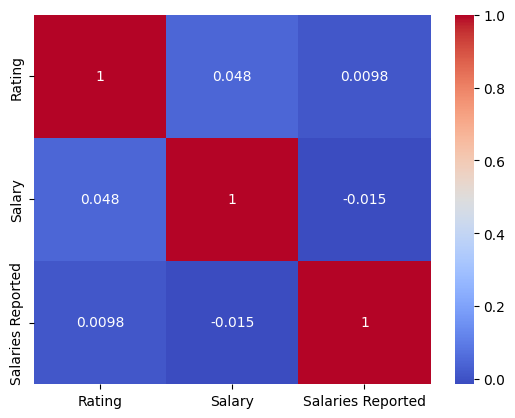

In [13]:
#correlation heatmap
sns.heatmap(df_numeric.corr(), annot=True, cmap="coolwarm")
plt.show()


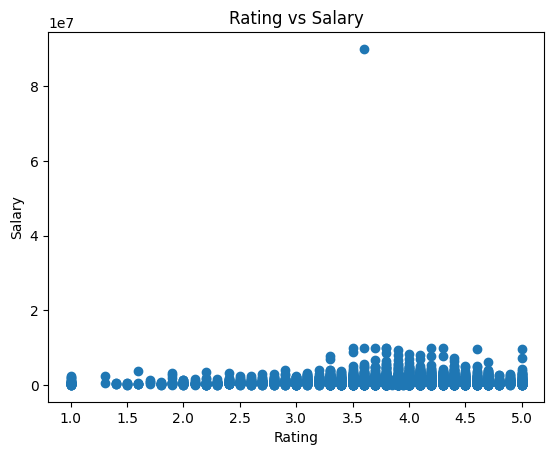

In [14]:
#data visualization(scatter plot)
plt.scatter(df_numeric['Rating'], df_numeric['Salary'])
plt.xlabel("Rating")
plt.ylabel("Salary")
plt.title("Rating vs Salary")
plt.show()



In [15]:
#feature and target split
X = df_numeric[['Rating', 'Salaries Reported']]
y = df_numeric['Salary']


In [16]:
#train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [17]:
#train regression model
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)


,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [18]:
#prediction
y_pred = model.predict(X_test)


In [19]:
#model evaluation
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r2)


MSE: 8995030200691.49
RMSE: 2999171.5857368833
R2 Score: -0.0021215626669068843
